In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler

### DataSet: Magic Gamma Telescope

Dua, D. and Graff, C. (2019), UCI Machine Learning Repository ['http://archive.ics.uci.edu/ml]. Irvine, CA: Univeristy of California, School of Information and Computer Sciences.

Donated By: P.Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

General Setup Cleaning and Transforming Data

In [2]:
cols =["fLength","fWidth","fSize","fConc","fConc1","fAsym","fm3Long", "fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("DataSets/magicGammaTelescope/magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fm3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Changing Class Gamma/Hadron to Numerical Data

In [3]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fm3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


For Each Label Name [:-1]: Compare Each Attribute Grouping By 'Class' 

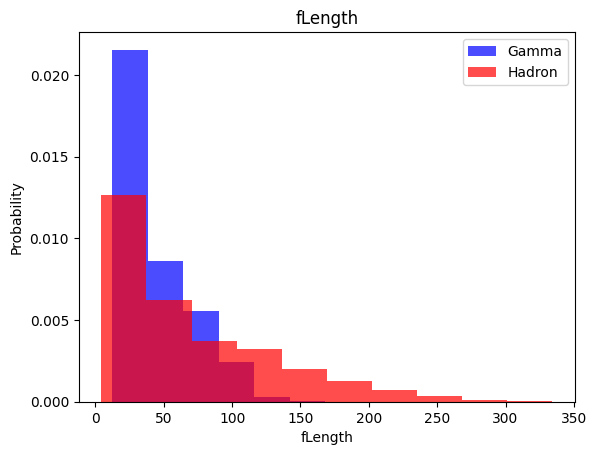

Label: fLength


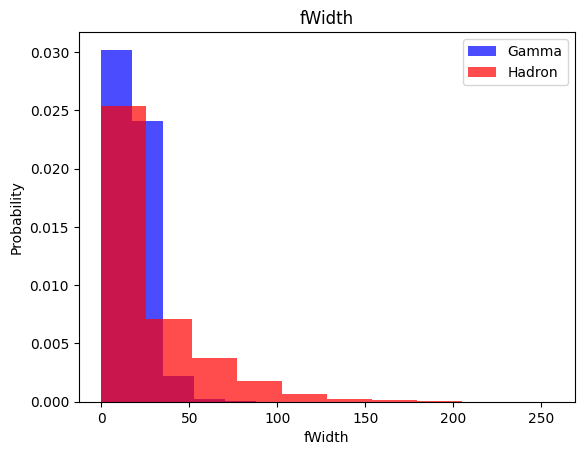

Label: fWidth


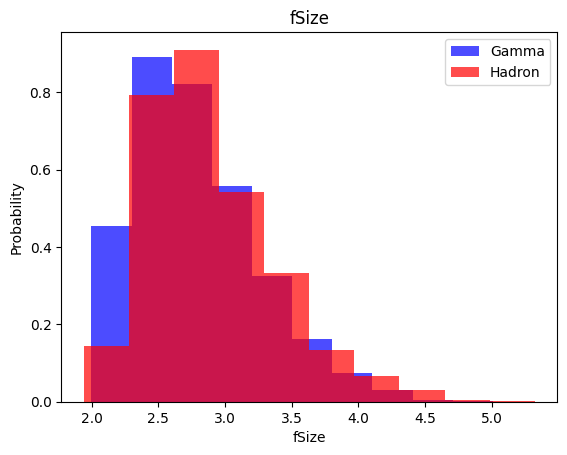

Label: fSize


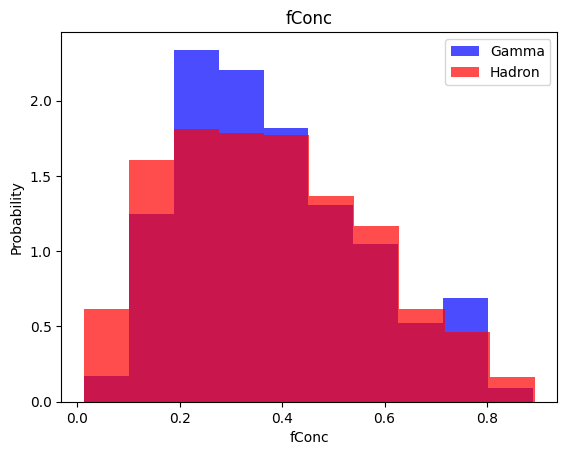

Label: fConc


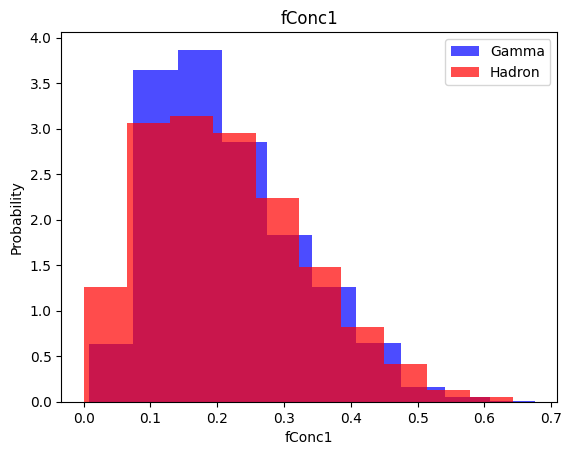

Label: fConc1


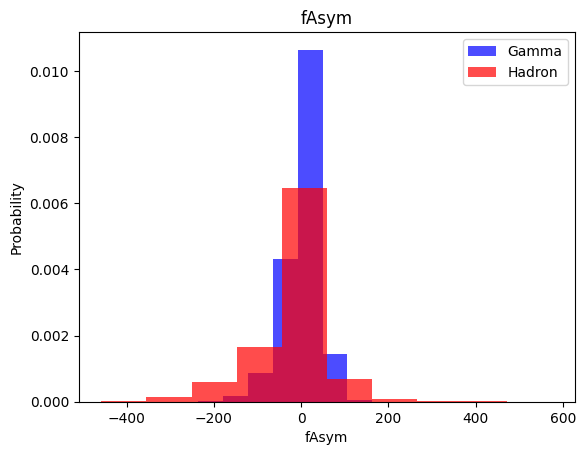

Label: fAsym


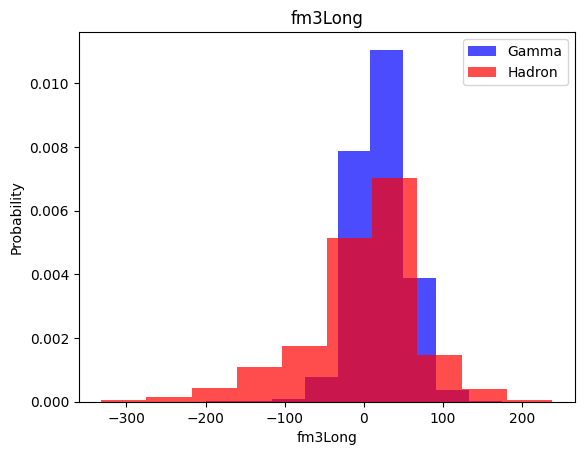

Label: fm3Long


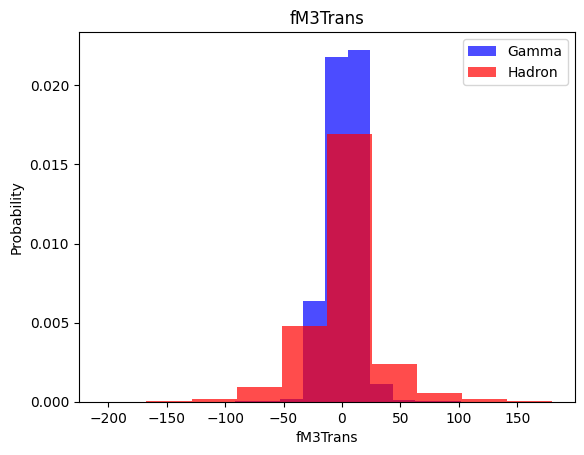

Label: fM3Trans


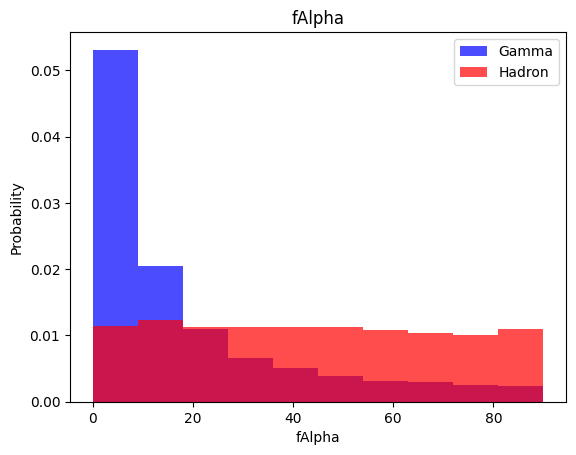

Label: fAlpha


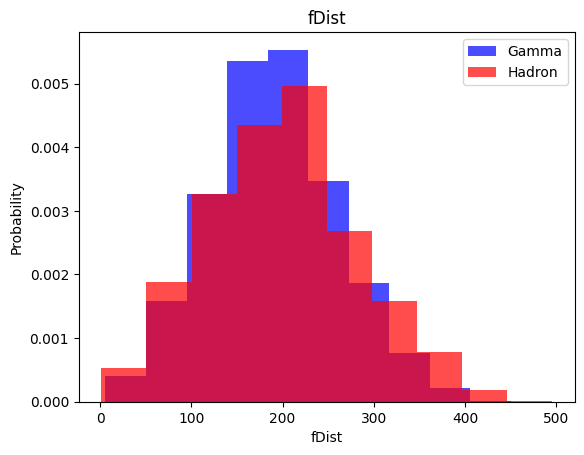

Label: fDist


In [4]:

for label in cols[:-1]:

    # Make a histogram of class; Gamma = 1, Hadron = 0, Generic Alpha, and Density Even Dist
    plt.hist(df[df["class"]==1][label], color='blue', label='Gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='Hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

    print("Label: " + label)

    

### Setup Vars for Train,Validate,Test
1st Seg: 0 -> 60% - Training Data <br>
2nd Seg: 60% -> 80% - Validation Data <br>
3rd Seg: 80 -> 100% - Testing Data <br>

In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


### Data of Different Scale.
EX: col1HighestValue === 5 vs. col2HighestValue === 5000000 <br>
We create a method to scale the data and shape any incorrectly dimensioned dataframes

In [6]:
def scale_dataset(dataframe, oversample=False):

    # get all values assuming label is last
    X = dataframe[dataframe.columns[:-1]].values
    # get labels
    y = dataframe[dataframe.columns[-1]].values

    # create imported scaler
    scaler = StandardScaler()
    # fit and transform to make x fit
    X = scaler.fit_transform(X)

    # If there is an oversample use package randomoversampler, and refit
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)

    # into a new data frame put reshaped data (data reshaping due to X is 2d, and y is a 1d vector) and horizontally stack them. side by side
    data = np.hstack((X, np.reshape(y, (-1,1))))

    return data, X, y

Scale Dataset, Training, Validtion, and Testing; Ready For Simple Built-In Scikit-Learn Models

In [7]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

### Model 1: K-Nearest Neighbors (K-NN)

In [8]:
# Created a model, parem - amount of nearest neighbors
knn_model = KNeighborsClassifier(n_neighbors=2)

# fit using X_train, and y_train data
knn_model = knn_model.fit(X_train, y_train)


### Classification Report (K-NearestNeighbors)

In [9]:
# PREDICTION - First Prediction
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Precision - How many of our labeling are confirmed to be True Positives
# 1st Test .77, .84; 1-n_neighbors
# 2nd Test .67, .87; 2-n_neighbors

# Recall - Of all that are truly positive how many do we actually get correct.
# 1st Test .68, .89; 1-n_neighbors
# 2nd Test .78, .80; 2-n_neighbors

# Accuracy - If we look at pure correct vs total.
# 1st Test .82; 1-n_neighbors
# 2nd Test .79; 2-n_neighbors

              precision    recall  f1-score   support

           0       0.66      0.78      0.71      1279
           1       0.88      0.79      0.83      2525

    accuracy                           0.79      3804
   macro avg       0.77      0.79      0.77      3804
weighted avg       0.80      0.79      0.79      3804



### Model 2: Naive-Bayes

In [10]:
# Naive-Bayes Gaussian Model; Named after the Mathematician as we do.
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

### Classification Report (Gaussian Naive-Bayes)

In [11]:
# PREDICTION - Notice Everything is variating from our previous method.
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.41      0.50      1279
           1       0.75      0.88      0.81      2525

    accuracy                           0.72      3804
   macro avg       0.69      0.65      0.65      3804
weighted avg       0.71      0.72      0.71      3804



### Model 3: Logistic Regression

In [12]:
# Logistic Regression Model; Multiple Logistic Regression 
# After taking a logistic regression and converting to a Sigmoid Function to keep within the realms of probability (0 -> 1).
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)

### Classification Report (Logistic Regression)

In [13]:
# PREDICTION - Notice Everything is variating from our previous method. little different. Result may vary
y_pred = lr_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68      1279
           1       0.85      0.81      0.83      2525

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



### Model 3: Support Vector Machine

In [14]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

### Classification Report (Support Vector Machine)

In [15]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1279
           1       0.90      0.89      0.89      2525

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



### Can we beat a common result, ~80%? Lets try Neural Networks

Take all of the features and turn them into inputs by giving them a weight value. <br>
Multiply the features and Sum "Insert Epsilon Here" and this is the Neuron. <br>
Add bias if needed. <br>
Then after all this comes together it is processed via ActivationFunction to get out output. <br><br>

*Note* without the ActivationFunction. This is a LinearModel.<br>
Examples include Sigmoid Functions (val from 0 -> 1), Tanh (val from -1 -> 1), and RELU (any val<0 = 0 -> val=Linear)<br><br>

Features x0, x1, x2<br>
Weighting w0, w1, w2<br>

[x0] *= w0<br>
[x1] *= w1<br>
[x2] *= w2<br>

[xT] = [x0] + [x1] + [x2] <br>

[xT] += BIAS -> AF() -> *** OUTPUT *** <br>

### Let's Go! Tensor Flow!

In [20]:
# Nueral net model shouold be layered that I pass in as a model
# Using a dense layer of 32 units
nn_model = tf.keras.Sequential([

    # layer of shape
    #second layer of no shape
    # third layer of sigmoid (project our predictions to be 0 or 1)
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10, )),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                 metrics=['accuracy'])

Display Tensor Flow Through PyPlot

In [22]:
# Lets plot
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel("Epoch")
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel("Epoch")
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [23]:
# Each epoch leave x% out and see how the model performs on the % segment taken out of the training
# this is validation split
history = nn_model.fit(X_train,y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.7591 - loss: 0.5122 - val_accuracy: 0.6700 - val_loss: 0.5852
Epoch 2/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.8417 - loss: 0.3738 - val_accuracy: 0.6908 - val_loss: 0.5937
Epoch 3/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.8466 - loss: 0.3594 - val_accuracy: 0.7239 - val_loss: 0.5506
Epoch 4/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.8519 - loss: 0.3503 - val_accuracy: 0.7546 - val_loss: 0.5012
Epoch 5/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.8581 - loss: 0.3350 - val_accuracy: 0.7358 - val_loss: 0.5217
Epoch 6/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.8580 - loss: 0.3362 - val_accuracy: 0.7560 - val_loss: 0.4899
Epoch 7/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.8622 - loss: 0.3346 - val_accuracy: 0.7696 - val_loss: 0.4595
Epoch 8/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.8663 - loss: 0

### Neural Network Result

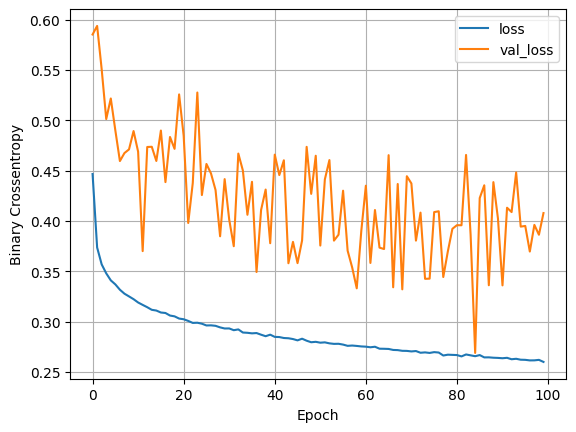

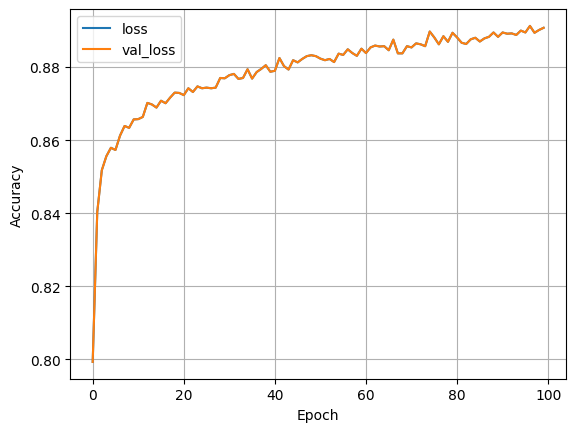

In [24]:
plot_loss(history)
plot_accuracy(history)